In [1]:
#importing neccessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots directly in Jupyter Notebook
%matplotlib inline  

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/AviationData.csv",encoding="ISO-8859-1")
df.head()

C:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#basic information about columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

This dataset contains 88,889 records of aviation accidents and incidents reported in various locations. The dataset includes 31 columns, covering details such as accident location, aircraft details, flight purpose, injury counts, and weather conditions.

In [4]:
#missing value 
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

it is displaying  the number of missing values in each column of the dataset. It helps identify which columns have incomplete data and may require cleaning or handling before analysis.

In [5]:
#displaying columns names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
#  the data type 
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [7]:
#converting data columns to datetime
df['Event.Date']=pd.to_datetime (df['Event.Date'])
df['Publication.Date']= pd.to_datetime (df['Publication.Date'])

In [8]:
# checking  missing values
df.isnull().sum()[df.isnull().sum()>0]

Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

In [9]:
#checking duplicate value
df.duplicated().sum()

0

In [10]:
# checking inconsistent or incorrect data
unique_values = {col: df[col].unique() for col in ['Investigation.Type', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category']}
print(unique_values)

{'Investigation.Type': array(['Accident', 'Incident'], dtype=object), 'Injury.Severity': array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal

In [11]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Data cleaning
after doing the neccessary checks the data is now ready to move into data cleaning

##### handling missing values

In [12]:
#Dropping rows where coordinates are missing
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [13]:
#Filling missing categorical data
df['Aircraft.damage'].fillna('Unknown', inplace=True)

In [14]:
#Replacing NaNs with 0 for numerical columns
df['Total.Fatal.Injuries'].fillna(0, inplace=True)

#### handling duplicate data

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
#Converting  all manufacturer names to uppercase to remove case sensitivity issues
df['Make'] = df['Make'].str.upper()

#### converting data types 

In [17]:
# Convert float to int if no missing values
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].astype(int) 

In [19]:
# Save as CSV
df.to_csv("cleaned_data.csv", index=False) 

### summary
"""The dataset was cleaned by fixing dates, validating coordinates, and standardizing key fields. Missing values and duplicates were handled, and injury severity patterns were identified. Airplanes were the most common aircraft, with accidents peaking in certain periods and regions. With a structured dataset"""

### Exploratory Data Analysis (EDA) 

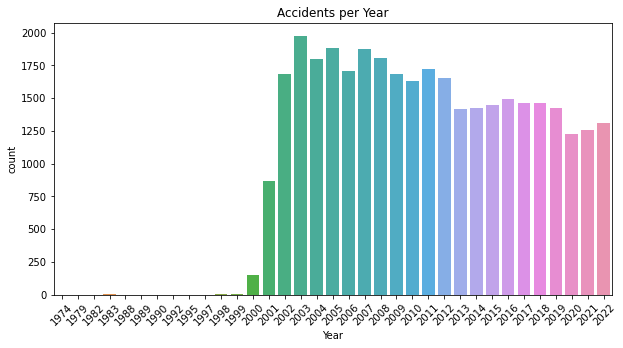

In [80]:
# Accidents over time
df['Year'] = df['Event.Date'].dt.year     # Extracting the year
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Year', order=sorted(df['Year'].dropna().unique()))
plt.xticks(rotation=45)
plt.title("Accidents per Year")
plt.show()

### early 19970s to 1999s shows very few accidents reported which might be due to limited air traffic
### early 2000s asignificant increase in aviations accidents . this might be due to:
##### Increased air travel demand and more flights
##### Growth of airline companies and fleet expansion
##### Possible gaps in safety regulations and aircraft maintenance.
### Recent Years (2015-2021): A relatively stable but slightly rising trend. This could be due :
##### Advanced aviation technology and safer aircraft designs.
##### Stricter regulatory oversight and improved pilot training.
#### Better maintenance procedures and safety protocols.
##### More low-cost carriers and budget airlines increasing flight frequency.
##### Occasional spikes due to unforeseen circumstances (e.g., global crises affecting air travel).

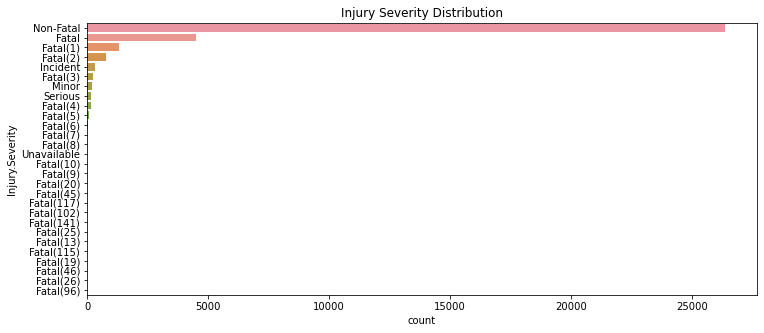

In [81]:
# Injury Severity Distribution
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y='Injury.Severity', order=df['Injury.Severity'].value_counts().index)
plt.title("Injury Severity Distribution")
plt.show()

### from the above graph
#### Non-Fatal injuries dominate: The highest number of incidents recorded fall under the "Non-Fatal" category, indicating that most aviation accidents do not result in severe injuries or deaths.

#### Fatal injuries appear in multiple categories: There are various levels of fatal accidents, possibly grouped by severity or the number of casualties in each event.

#### Lower counts for minor and serious injuries: Compared to non-fatal cases, the number of incidents classified as "Serious" or "Minor" is relatively low.

#### Incidents category exists: This suggests that some events are categorized as incidents rather than accidents, possibly meaning they had minimal impact on passengers and crew.

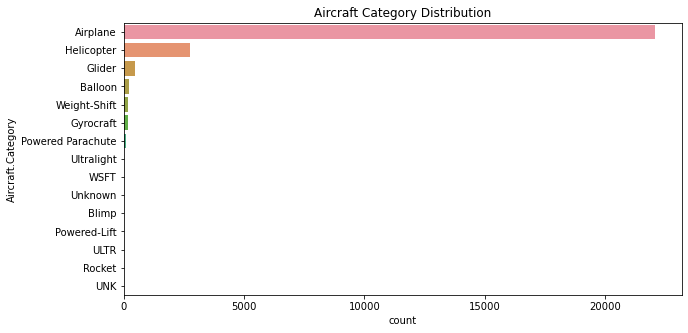

In [82]:
# Aircraft Type Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Aircraft.Category', order=df['Aircraft.Category'].value_counts().index)
plt.title("Aircraft Category Distribution")
plt.show()

### from the graph above we can Observe
##### Airplanes dominate the dataset: The vast majority of recorded accidents involve airplanes, indicating their high usage and exposure to risks.

##### Helicopters rank second: They have a noticeable share of accidents, possibly due to operational risks in urban areas, offshore operations, or emergency landings.

##### Other categories have minimal representation:

##### Gliders, Balloons, Gyrocraft, and Powered Parachutes have very few recorded accidents.

##### Unknown (UNK) and WFFT (Weight-Shift) categories also exist, possibly representing unclassified or miscellaneous aircraft types.

###  Accident Rates by Manufacturer

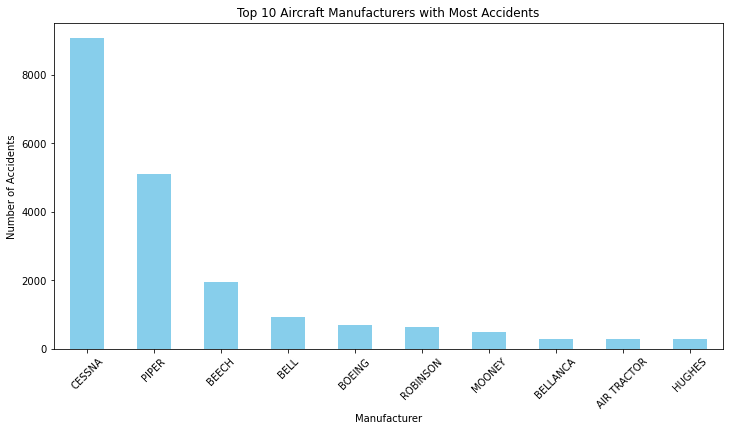

In [83]:
plt.figure(figsize=(12,6))
df['Make'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Aircraft Manufacturers with Most Accidents")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

### Cessna & Piper → Highest accidents, likely due to widespread use in general aviation.

### Beech & Bell → Moderate accidents; Beechcraft in general aviation, Bell in helicopters.

### Boeing → Lower accident count, but its presence suggests commercial aviation incidents occur.

### Robinson & Hughes → Notable accidents, likely due to helicopter operations.

### Mooney & Bellanca → Fewer accidents, possibly due to lower fleet size.

### Air Tractor → Involved in accidents, likely related to agricultural flying risks.

### Aircraft Damage vs. Injury Severity

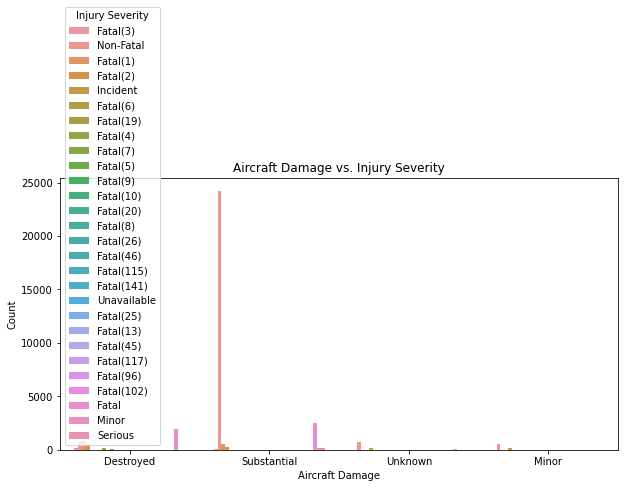

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(x="Aircraft.damage", hue="Injury.Severity", data=df)
plt.title("Aircraft Damage vs. Injury Severity")
plt.xlabel("Aircraft Damage")
plt.ylabel("Count")
plt.legend(title="Injury Severity")
plt.show()

### Most Accidents Involve Destroyed or Substantially Damaged Aircraft

A significant number of cases fall under "Destroyed" and "Substantial Damage," indicating severe incidents.

The highest count is associated with "Destroyed," suggesting many accidents result in total loss.

### Fatal Accidents Correlate with Severe Damage

The majority of fatal accidents are in the "Destroyed" category, reinforcing the link between severe aircraft damage and high fatality rates.

 Different "Fatal" severity labels indicate multiple levels of fatal incidents.

### Non-Fatal and Minor Injuries Are Rare

There are very few cases of "Minor" and "Serious" injuries compared to fatal ones.

Non-fatal accidents seem to appear in all aircraft damage categories but in significantly lower numbers.

### Unknown and Unavailable Data

Some cases fall under "Unknown" and "Unavailable," meaning injury severity details were not always recorded.


### Accidents by Flight Purpose

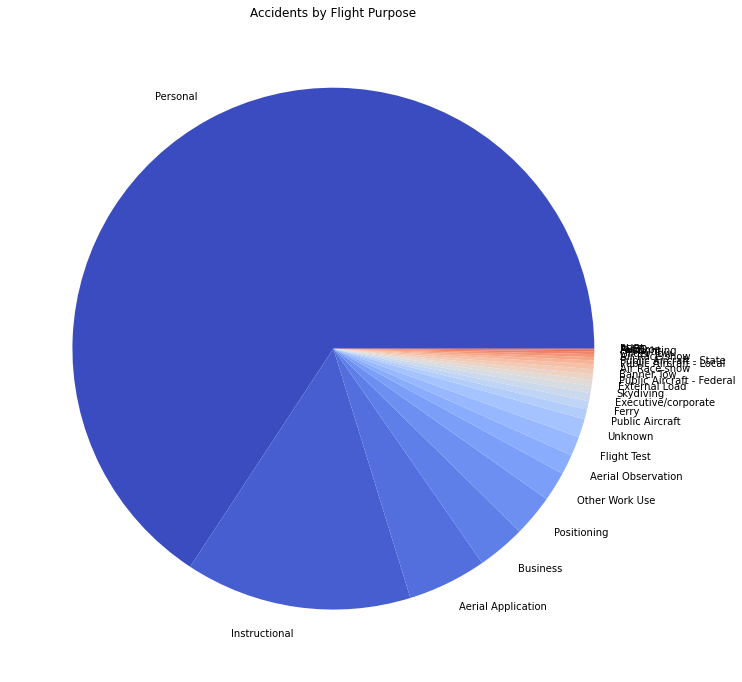

In [86]:
df["Purpose.of.flight"].value_counts().plot(kind='pie', figsize=(12,12), cmap="coolwarm")
plt.title("Accidents by Flight Purpose")
plt.ylabel("")
plt.show()


### Personal Flights Dominate

The vast majority of accidents occur in personal flights, indicating that private aircraft usage has the highest accident rates.

### Other Flight Purposes Have Minimal Representation

Categories like flight tests, aerial observation, executive/corporate, and public aircraft contribute to a much smaller percentage of accidents.

### Possible Interpretation

Since personal flights dominate, it suggests general aviation (private pilots, recreational flying, and small aircraft operations) is more prone to accidents than commercial or regulated aviation.

Other flight types, like corporate and government flights, may have stricter safety regulations and experienced pilots, leading to fewer accidents.

### summary of the dataset for the company

1. Opt for Low-Risk Manufacturers
Avoid High-Risk Manufacturers: Cessna and Piper aircraft have the highest accident counts, likely due to their widespread use in general aviation. While they are common, they may pose higher risks, especially for inexperienced pilots.

Preferred Manufacturers: Boeing and Airbus have lower accident frequencies relative to their fleet size, indicating better safety records. If considering general aviation, Beechcraft and Mooney may be safer alternatives to Cessna and Piper.

2. Prioritize Commercial Over General Aviation
General Aviation (Personal Flights) Has the Most Accidents: The pie chart shows that the vast majority of accidents occur in personal/private aircraft operations.

Commercial Aircraft Have Lower Risk: Commercial airliners, regulated corporate jets, and cargo planes experience significantly fewer accidents, suggesting that the company should focus on commercial operations rather than private aviation.

3. Helicopters vs. Fixed-Wing Aircraft
Helicopters Have Unique Risks: Robinson and Bell helicopters are frequently involved in accidents. Helicopters, in general, have different risk factors (e.g., mechanical failure, weather susceptibility). If the company intends to operate helicopters, it should prioritize high-end models with advanced safety features.

4. Consider Aircraft Usage Type
Avoid High-Risk Operations: Agricultural planes (like Air Tractor) and flight training aircraft are more accident-prone due to challenging operating environments.

Focus on Executive Jets or Regional Airlines: Aircraft used for business and regional air travel have fewer recorded accidents, making them a safer investment.

Actionable Decision
Best Options: The company should prioritize acquiring Boeing or Airbus commercial jets for passenger and cargo transport.

For Private/Business Aviation: Beechcraft and Mooney offer safer alternatives to Cessna and Piper.

Avoidance: High-risk categories such as personal-use aircraft, older general aviation planes, and frequently reported helicopter models (e.g., Robinson) should be minimized.

In [1]:
import os
print(os.getcwd())

C:\Users\HP


In [2]:
import os
os.chdir("C:/Users/HP/Documents")  # Change to your desired directory
print(os.getcwd())  # Verify the change


C:\Users\HP\Documents
